In [ ]:
!pip install -q qiskit
!pip install -q qiskit-aer
!pip install -q pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

In [ ]:
#Oracle for flipping the state |111>
def grover_oracle_3qubit():
    qc = QuantumCircuit(3)
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    return qc

In [ ]:
def diffusion_operator_3qubit():
    qc = QuantumCircuit(3)
    qc.h([0, 1, 2])
    qc.x([0, 1, 2])
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    qc.x([0, 1, 2])
    qc.h([0, 1, 2])
    return qc


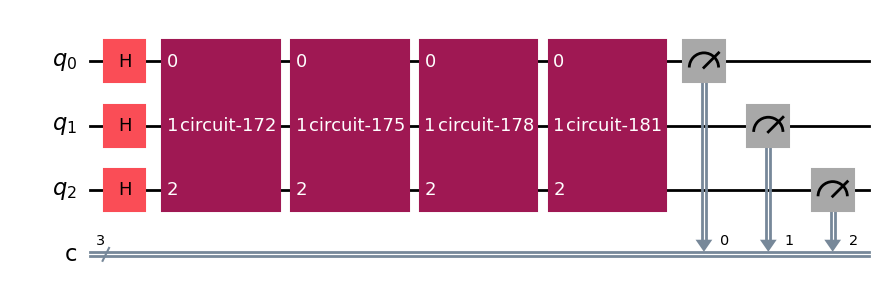

In [ ]:
#making the circuit
grover_circuit = QuantumCircuit(3, 3)
grover_circuit.h([0, 1, 2])
for _ in range(2):
    grover_circuit.append(grover_oracle_3qubit(), [0, 1, 2])
    grover_circuit.append(diffusion_operator_3qubit(), [0, 1, 2])
grover_circuit.measure([0, 1, 2], [0, 1, 2])
grover_circuit.draw('mpl')

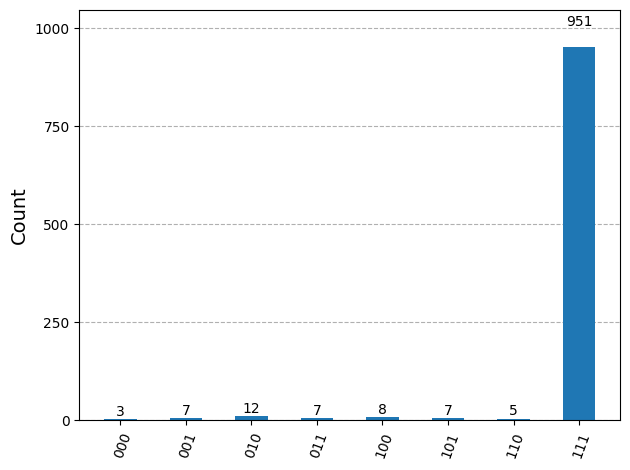

In [ ]:
simulator = AerSimulator()
transpiled_circuit = transpile(grover_circuit, simulator)
result = simulator.run(transpiled_circuit, shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)